In [1]:
import pandas as pd
import numpy as np
import scipy.special
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Create Data Frame

In [3]:

df = pd.DataFrame(X, columns= feature_names )
df['Class_labels'] = y
df['Class_labels'] = df['Class_labels'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.head()
df = pd.DataFrame(X, columns= feature_names )
df['Class_labels'] = y
df['Class_labels'] = df['Class_labels'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Some basic statistical analysis about the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class_labels       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Class_labels'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Class_labels, dtype: int64

In [7]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class_labels         0
dtype: int64

### Visualize the Data

<AxesSubplot:>

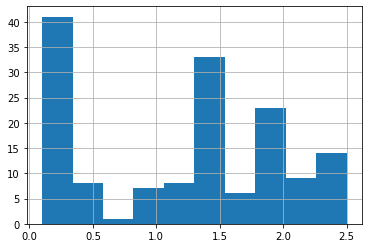

In [8]:
# histograms
df['petal width (cm)'].hist()

In [9]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['virginica','versicolor','setosa']

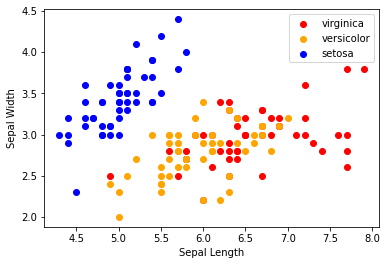

In [10]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

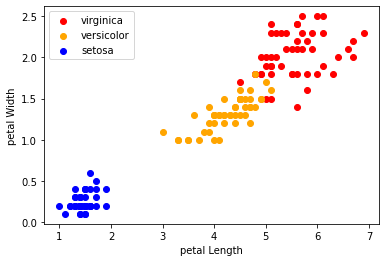

In [11]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()


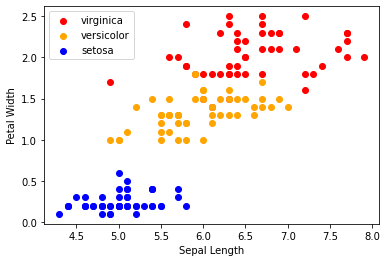

In [12]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()


In [13]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()


In [14]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(

    X_scaled, Y, test_size=0.2, random_state=42)

n_features = X.shape[1]
n_classes = Y.shape[1]

X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T


In [15]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (4, 120)
shape of Y_train : (3, 120)
shape of X_test : (4, 30)
shape of Y_test : (3, 30)


### Create Model

In [45]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [46]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

#### Initialize Parameters

In [47]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [48]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

In [49]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

In [50]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [51]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [52]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [66]:
iterations = 40000
n_h = 8
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 1.0984229606454112
Cost after 4000 iterations is : 0.539358603396551
Cost after 8000 iterations is : 0.24852811710321865
Cost after 12000 iterations is : 0.14912505519351268
Cost after 16000 iterations is : 0.10651985851603553
Cost after 20000 iterations is : 0.08689618011135472
Cost after 24000 iterations is : 0.07636342532425122
Cost after 28000 iterations is : 0.06992910319202057
Cost after 32000 iterations is : 0.0656160509616394
Cost after 36000 iterations is : 0.06252775799134795


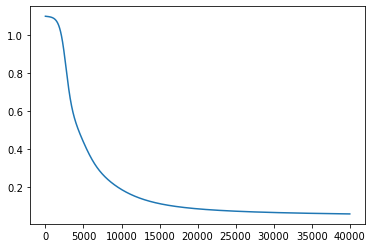

In [67]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [68]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [69]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 97.5 %
Accuracy of Test Dataset 100.0 %
